In [16]:
library(targets)
library(tarchetypes)

In [67]:
tar_visnetwork()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘matrixStats’

The following object is masked from ‘package:dplyr’:

    count


Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuant

HTML widgets cannot be represented in plain text (need html)

In [60]:
source('genebasisr.R')

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

In [58]:
tar_load(names=c("sce_ngo_00_all_40k"))

In [61]:
tar_load(names=c("ngo_panel_5ea"))

In [59]:
sce_ngo_00_all_40k

class: SingleCellExperiment 
dim: 18074 40000 
metadata(0):
assays(2): counts logcounts
rownames(18074): Lypla1 Tcea1 ... Csprs Prl
rowData names(0):
colnames(40000): GTGAGCCAGGTGCCTC_1_2_1 CTGTCGTTCACTAGCA_3_1_2 ...
  GTGCAGCGTAGCTTTG_4_1_2 GTCTCACTCGGAAACG_4_2_1
colData names(36): orig.ident nCount_RNA ... polar_label ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(1): RNA

In [66]:
gbr_retain_informative_genes_preselected(sce_ngo_00_all_40k, n=NULL, preselected_genes=ngo_panel_5ea)

4227 genes retained

class: SingleCellExperiment 
dim: 4259 40000 
metadata(0):
assays(2): counts logcounts
rownames(4259): Mamdc4 Swap70 ... Cenpa Vmn2r81
rowData names(0):
colnames(40000): GTGAGCCAGGTGCCTC_1_2_1 CTGTCGTTCACTAGCA_3_1_2 ...
  GTGCAGCGTAGCTTTG_4_1_2 GTCTCACTCGGAAACG_4_2_1
colData names(36): orig.ident nCount_RNA ... polar_label ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(1): RNA

In [65]:
sce = sce_ngo_00_all_40k
preselected_genes = ngo_panel_5ea
n=NULL
sce_genes_excluding_panel = rownames(logcounts(sce)) %>% setdiff(preselected_genes)
sce_excluding_panel = sce[sce_genes_excluding_panel,]
sce_excluding_panel = geneBasisR::retain_informative_genes(sce, n=n)
infomrative_genes_excluding_panel = rownames(logcounts(sce_excluding_panel))
selected_genes = union(preselected_genes, infomrative_genes_excluding_panel)
sce_filtered = sce[selected_genes,]
sce_filtered

4227 genes retained

class: SingleCellExperiment 
dim: 4259 40000 
metadata(0):
assays(2): counts logcounts
rownames(4259): Mamdc4 Swap70 ... Cenpa Vmn2r81
rowData names(0):
colnames(40000): GTGAGCCAGGTGCCTC_1_2_1 CTGTCGTTCACTAGCA_3_1_2 ...
  GTGCAGCGTAGCTTTG_4_1_2 GTCTCACTCGGAAACG_4_2_1
colData names(36): orig.ident nCount_RNA ... polar_label ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(1): RNA

In [89]:
?evaluate_library

evaluate_library {geneBasisR},R Documentation
sce,SingleCellExperiment object containing gene counts matrix (stored in 'logcounts' assay).
genes.selection,Character vector specifying genes to be used for the construction of Selection kNN-graph.
genes.all,Character vector specifying genes to be used for the construction of True kNN-graph.
batch,Name of the field in colData(sce) to specify batch. Default batch=NULL if no batch is applied.
n.neigh,"Positive integer > 1, specifying number of neighbors to use for kNN-graph. Default n.neigh=5."
nPC.all,Scalar (or NULL if no PCA is to be applied) specifying number of PCs to use for construction of True kNN-graph. Default nPC.all=50.
library.size_type,"String identifying whether evaluation should be performed only on the whole inserted library (= 'single') or on a series of subsets of the library (= 'series'). Default library.size_type=""single""."
n_genes.step,"In case library.size_type == ""series"", a scalar identifying the step of the grid for library subsets. Default n_genes.step=10."
return.cell_score_stat,Boolean identifying whether stat on cell neighborhood preservation score should be returned. Default return.cell_score_stat=TRUE.
return.gene_score_stat,Boolean identifying whether stat on gene prediction score should be returned. Default return.gene_score_stat=TRUE.


In [36]:
tar_errored()

[1] "obj_ngo_pl_MOL__a2_Tanycytes"        
[2] "sce_ngo_pl_00_MOL__a2_Tanycytes"     
[3] "sce_ngo_pl_01_MOL__a2_Tanycytes"     
[4] "genes_stat_pl_100_MOL__a2_Tanycytes" 
[5] "ctm_pl_MOL__a2_Tanycytes"            
[6] "lib_stat_pl_MOL__a2_Tanycytes"       
[7] "redundancy_stat_pl_MOL__a2_Tanycytes"
[8] "genes_50_vec_MOL__a2_Tanycytes"

In [25]:
library(tibble)
library(ggplot2)
library(wesanderson)
library(ggcorrplot)
library(ggpubr)
library(tidyverse)
library(geneBasisR)

In [95]:
lib_stat = qs::qread('_targets/objects/lib_stat_00_other')

Warning message:
“Removed 40 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1383 rows containing non-finite values (stat_boxplot).”


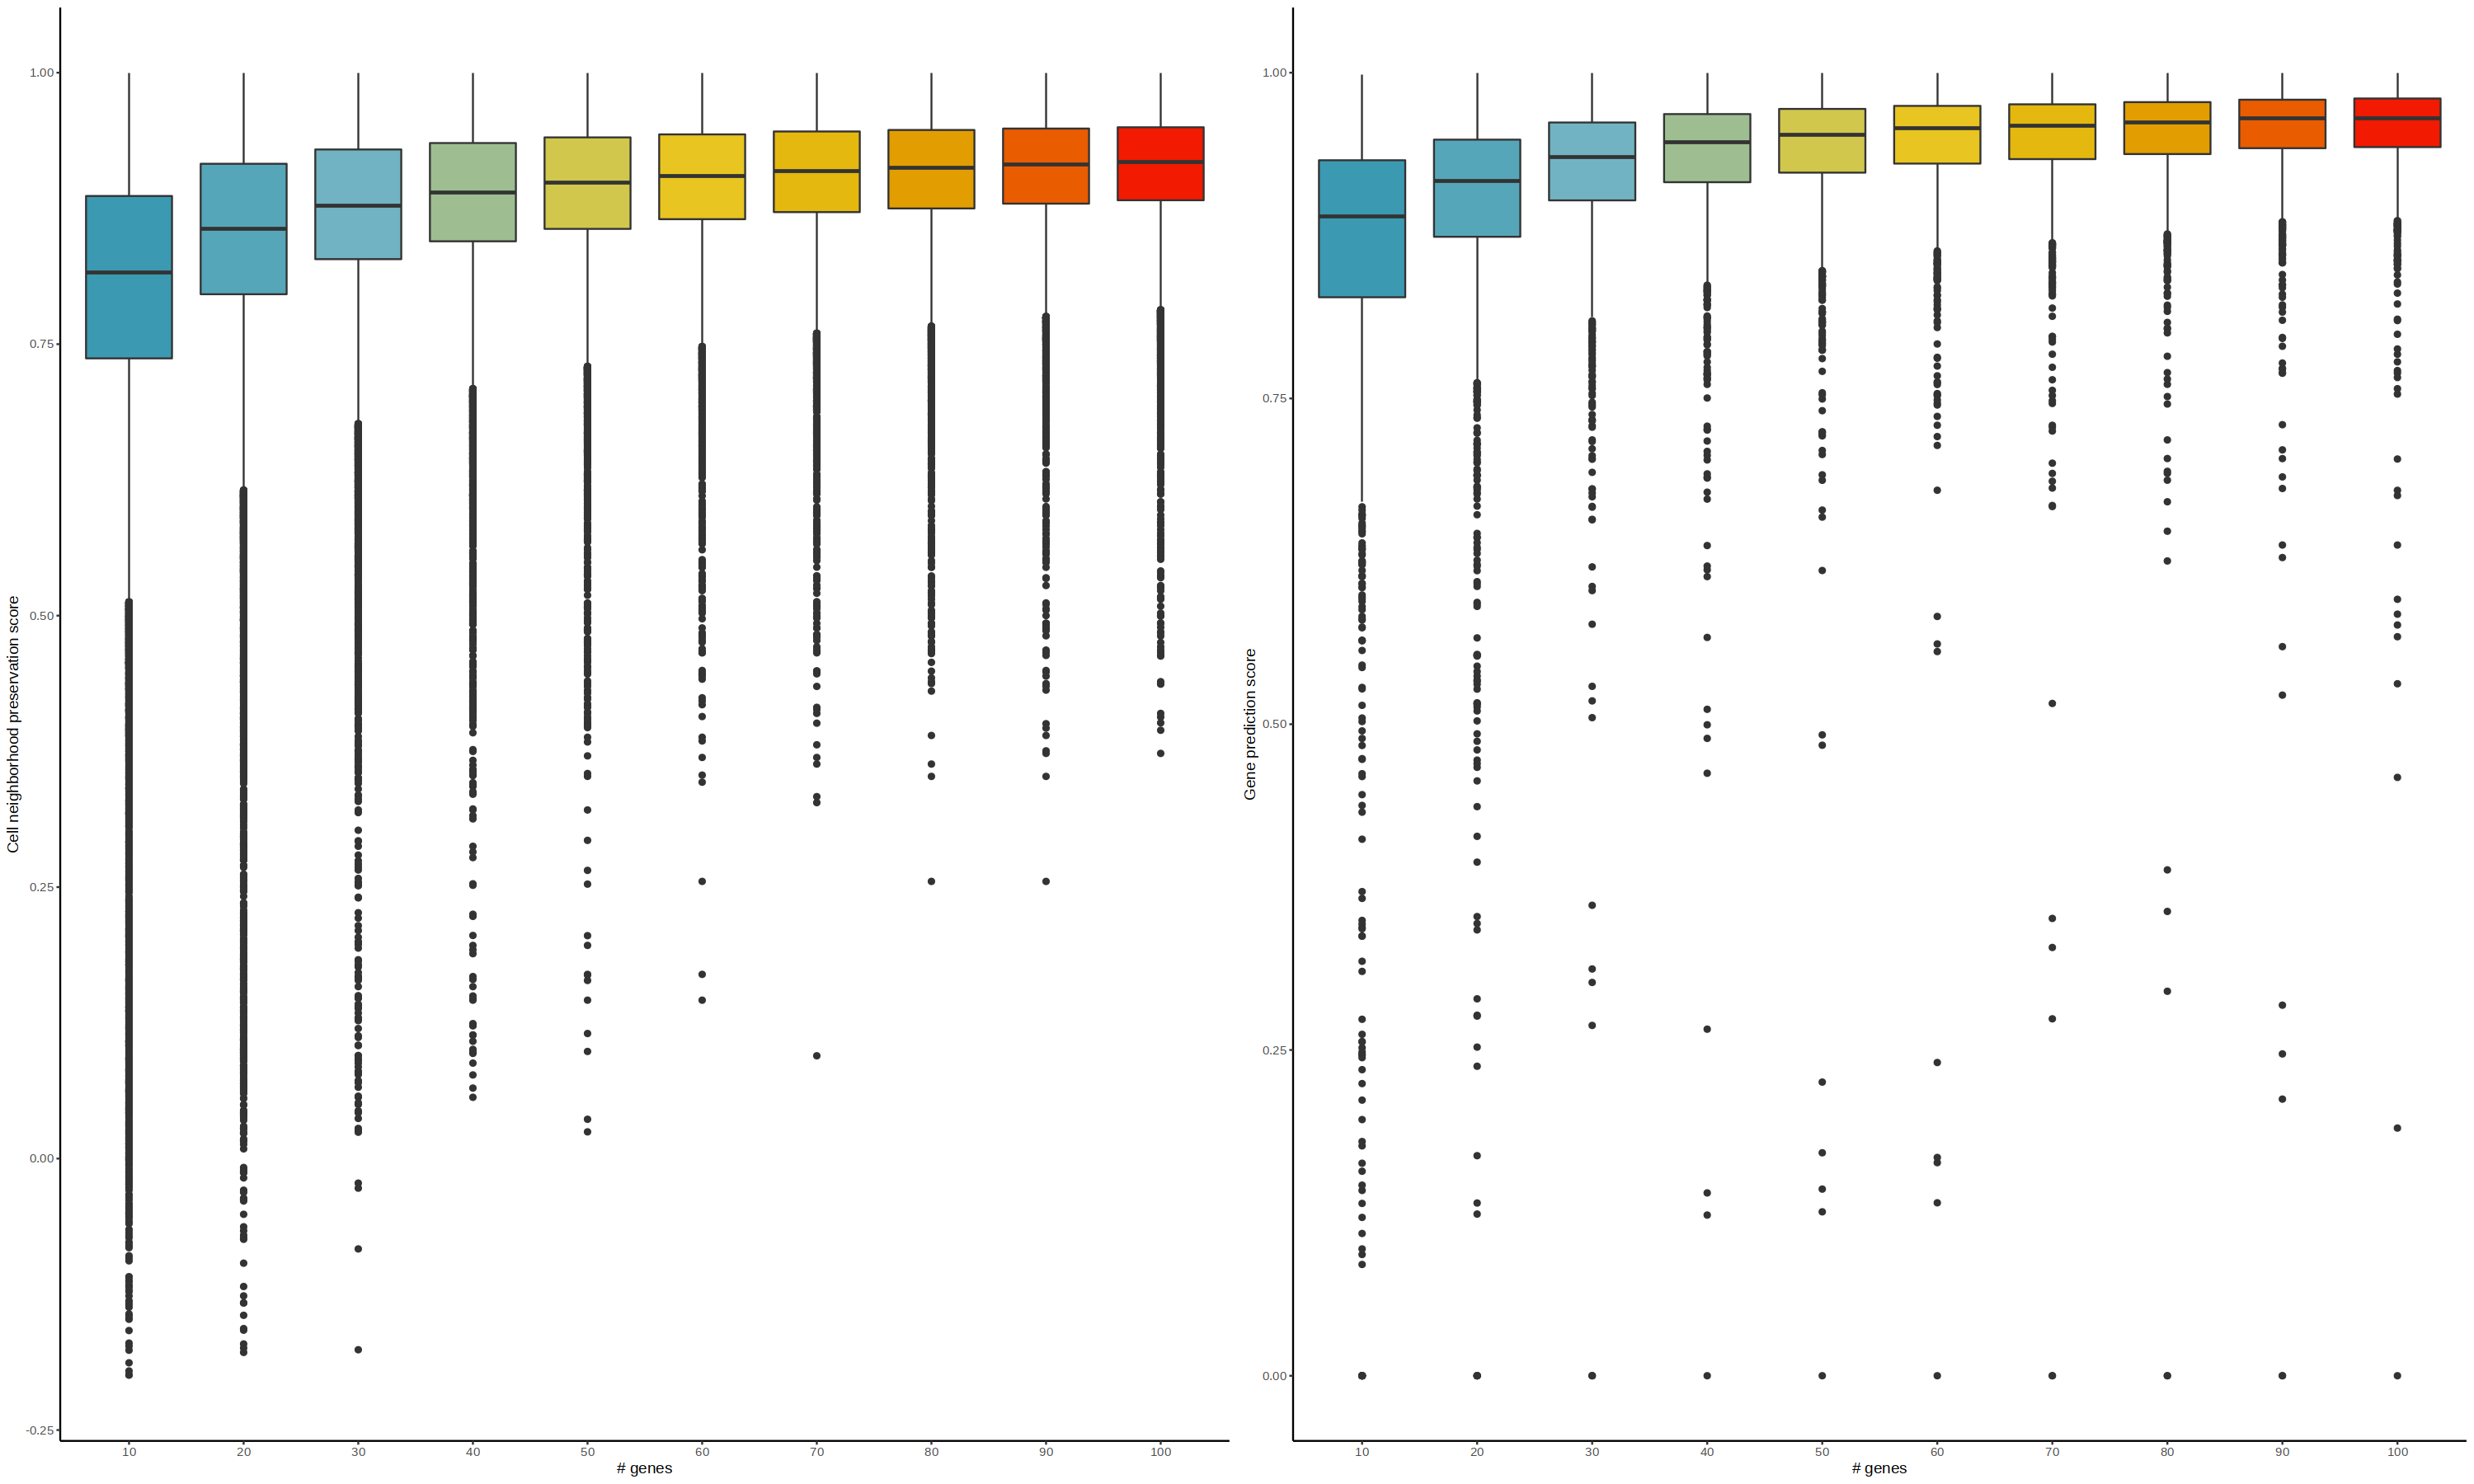

In [96]:
options(repr.plot.width=25, repr.plot.height=15)
p1 = ggplot(lib_stat$cell_score_stat , aes(x = n_genes , y = cell_score, fill = n_genes)) +
  geom_boxplot() +
  scale_fill_manual(values = wes_palette("Zissou1", length(levels(lib_stat$cell_score_stat$n_genes)), type = "continuous")) +
  ylim(c(-.2,1)) +
  theme_classic() +
  labs(y = "Cell neighborhood preservation score" , x = "# genes") +
  theme(legend.position = "none")
p2 = ggplot(lib_stat$gene_score_stat , aes(x = n_genes , y = gene_score, fill = n_genes)) +
  geom_boxplot() +
  scale_fill_manual(values = wes_palette("Zissou1", length(levels(lib_stat$gene_score_stat$n_genes)), type = "continuous")) +
  ylim(c(0,1)) +
  theme_classic() +
  labs(y = "Gene prediction score" , x = "# genes") +
  theme(legend.position = "none")

p = ggarrange(p1,p2,ncol=2)
#> Warning: Removed 11 rows containing non-finite values (stat_boxplot).
#> Warning: Removed 648 rows containing non-finite values (stat_boxplot).
p

In [50]:
redundancy_stat = qs::qread('_targets/objects/redundancy_stat_other')
redundancy_stat = redundancy_stat %>% arrange(frac_correctly_mapped)
head(redundancy_stat)

,celltype,frac_correctly_mapped,gene,frac_correctly_mapped_all,frac_correctly_mapped_ratio
,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,Tbx19.none,0,Pde8b,0,NaN
2,Tbx19.none,0,Dnah6,0,NaN
3,Tbx19.none,0,Deptor,0,NaN
4,Tbx19.none,0,Prkg1,0,NaN
5,Tbx19.none,0,Arhgef28,0,NaN
6,Tbx19.none,0,Neat1,0,NaN


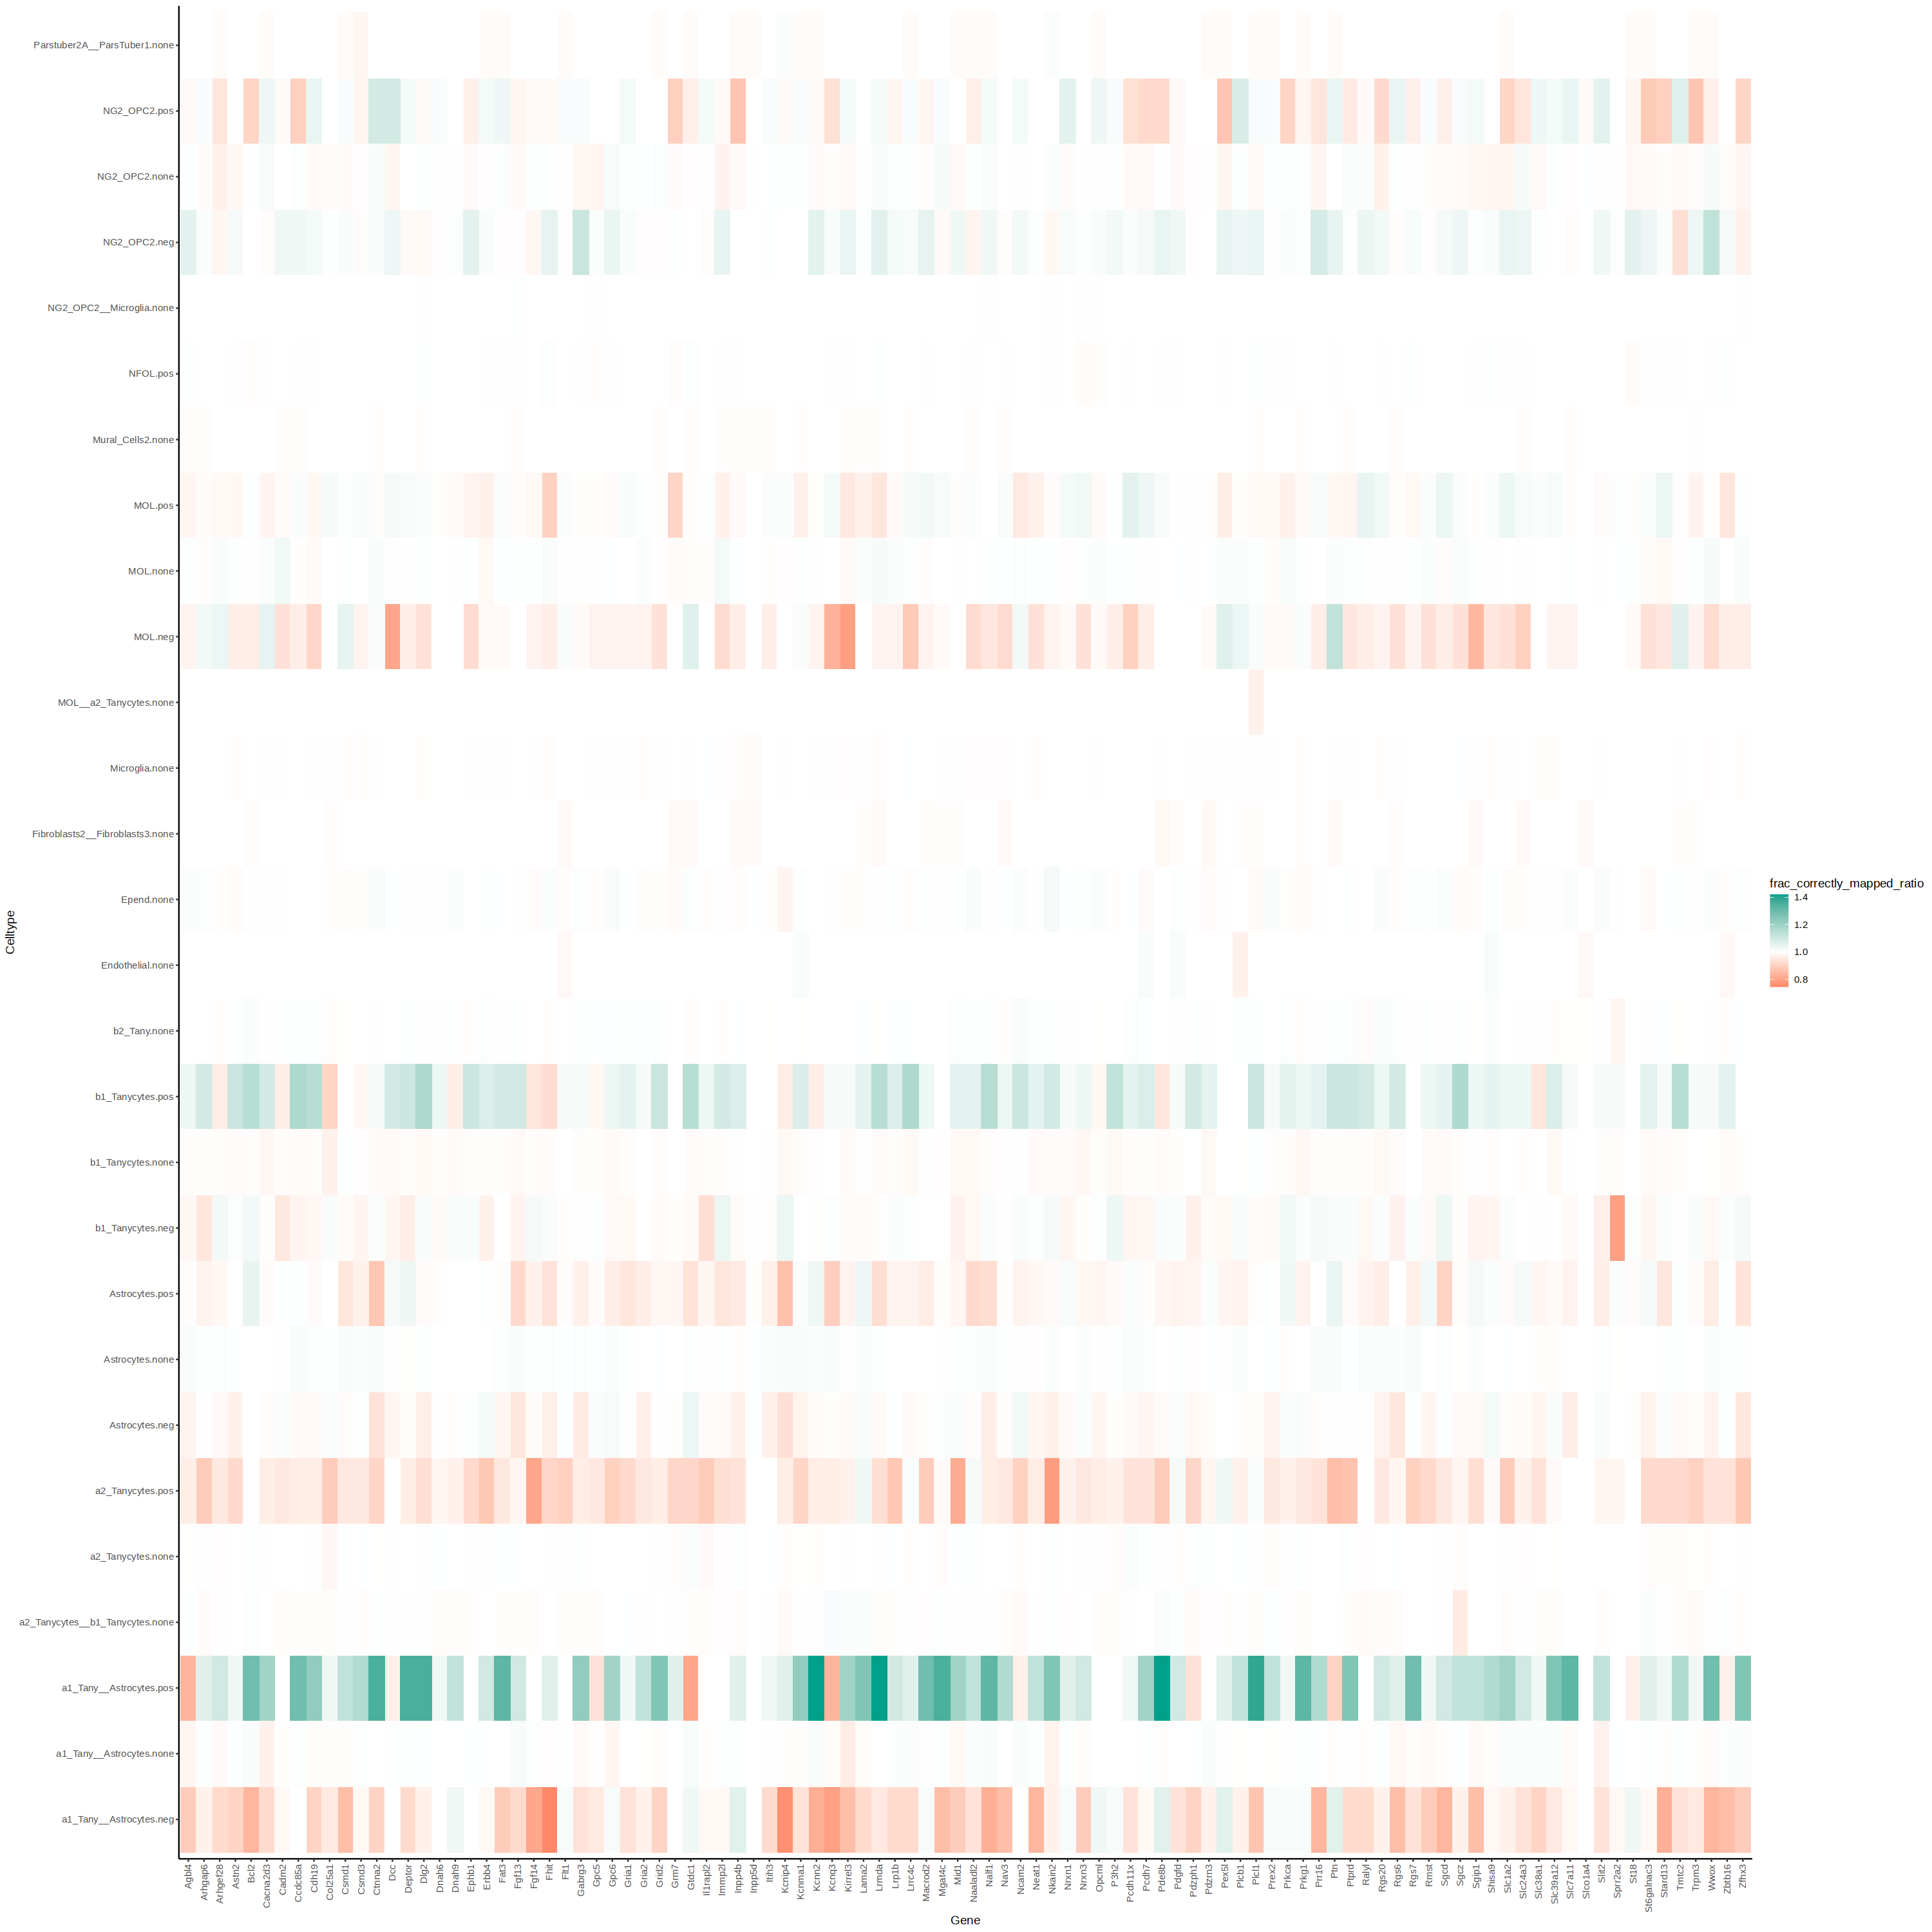

In [51]:
options(repr.plot.width=25, repr.plot.height=25)
p = plot_redundancy_stat(redundancy_stat) 
p 

In [52]:
sce = qs::qread('_targets/objects/sce_ngo_01_other')
genes = qs::qread('_targets/objects/genes_100_other')
ctm = qs::qread('_targets/objects/ctm_00_100_other')

In [68]:
tar_load(names=c("ngo_panel_5ea"))
ngo_panel_5ea

[1] "Mamdc4"    "Swap70"    "Zfp11"     "Ust"       "Atf7"      "Sorcs2"   
 [7] "Cnot8"     "Ankra2"    "Pcdhb19"   "Txnl4b"    "Rab11fip5" "Psmd13"   
[13] "Tcof1"     "Rab2b"     "Smarcc1"   "Rdh13"     "Tpp2"      "Bend7"    
[19] "Smoc1"     "Usp20"     "Igf1r"     "Prkca"     "Fbxl5"     "Adgb"     
[25] "Nmt2"      "Trpc5"     "Syn2"      "Cntn3"     "Ppargc1a"  "Nav1"     
[31] "Zfpm2"     "Pias1"     "Zfp160"    "Abi1"      "Atp5b"     "Zgrf1"    
[37] "Hat1"      "Atad2"     "Cdk5rap2"  "Gnal"      "Fbxw5"     "Foxn2"    
[43] "Rpl32"     "Arid2"     "Kcna1"     "Ttll3"     "Rock2"     "Marchf2"  
[49] "Thumpd1"   "Hdac11"    "Manbal"    "Il1rapl2"  "Pcdh15"    "Cdc37"    
[55] "Zdhhc3"    "R3hcc1"    "Txnl4a.1"  "Zfp879"    "Ccnf"      "Atp5e"

In [71]:
?plot_expression_heatmap

plot_expression_heatmap {geneBasisR},R Documentation
sce,SingleCellExperiment object containing gene counts matrix (stored in 'logcounts' assay).
celltype.id,"Character specifying which field in colData(sce) should be used as celltype. Default celltype.id=""celltype""."
genes,Character vector containing gene names.
value.type,"String specifying whether to plot average expression (= ""mean"") or fraction of cells with non-zero counts(= ""frac"")."


In [75]:
tar_load(names=c("genes_100_all_40k_pre5ea"))
genes_100_all_40k_pre5ea

[1] "Mamdc4"    "Swap70"    "Zfp11"     "Ust"       "Atf7"      "Sorcs2"   
  [7] "Cnot8"     "Ankra2"    "Pcdhb19"   "Txnl4b"    "Rab11fip5" "Psmd13"   
 [13] "Tcof1"     "Rab2b"     "Smarcc1"   "Rdh13"     "Tpp2"      "Bend7"    
 [19] "Smoc1"     "Usp20"     "Igf1r"     "Prkca"     "Fbxl5"     "Adgb"     
 [25] "Nmt2"      "Trpc5"     "Syn2"      "Cntn3"     "Ppargc1a"  "Nav1"     
 [31] "Zfpm2"     "Pias1"     "Zfp160"    "Abi1"      "Atp5b"     "Zgrf1"    
 [37] "Hat1"      "Atad2"     "Cdk5rap2"  "Gnal"      "Fbxw5"     "Foxn2"    
 [43] "Rpl32"     "Arid2"     "Kcna1"     "Ttll3"     "Rock2"     "Marchf2"  
 [49] "Thumpd1"   "Hdac11"    "Manbal"    "Il1rapl2"  "Pcdh15"    "Cdc37"    
 [55] "Zdhhc3"    "R3hcc1"    "Txnl4a.1"  "Zfp879"    "Ccnf"      "Atp5e"    
 [61] "Erbb4"     "Nrxn3"     "Cntn5"     "Galntl6"   "Rbfox1"    "Kcnip4"   
 [67] "Zfp804b"   "Lingo2"    "Gpc6"      "Cntn4"     "Trpm3"     "Adarb2"   
 [73] "Pde10a"    "Pcdh9"     "Sgcz"      "Ptprt"     "Nxph1"     "Kirrel3"  
 [79] "Robo1"     "Col25a1"   "Nrg1"      "Prr16"     "Inpp5d"    "Mgat4c"   
 [85] "Sorcs1"    "Grm8"      "Nkain2"    "Sgcd"      "Inpp4b"    "Egfem1"   
 [91] "Slit2"     "Fgf13"     "Ncam2"     "Dcc"       "Kctd16"    "Dock2"    
 [97] "Pcdh11x"   "Plcl1"     "Ptprk"     "Cadm2"

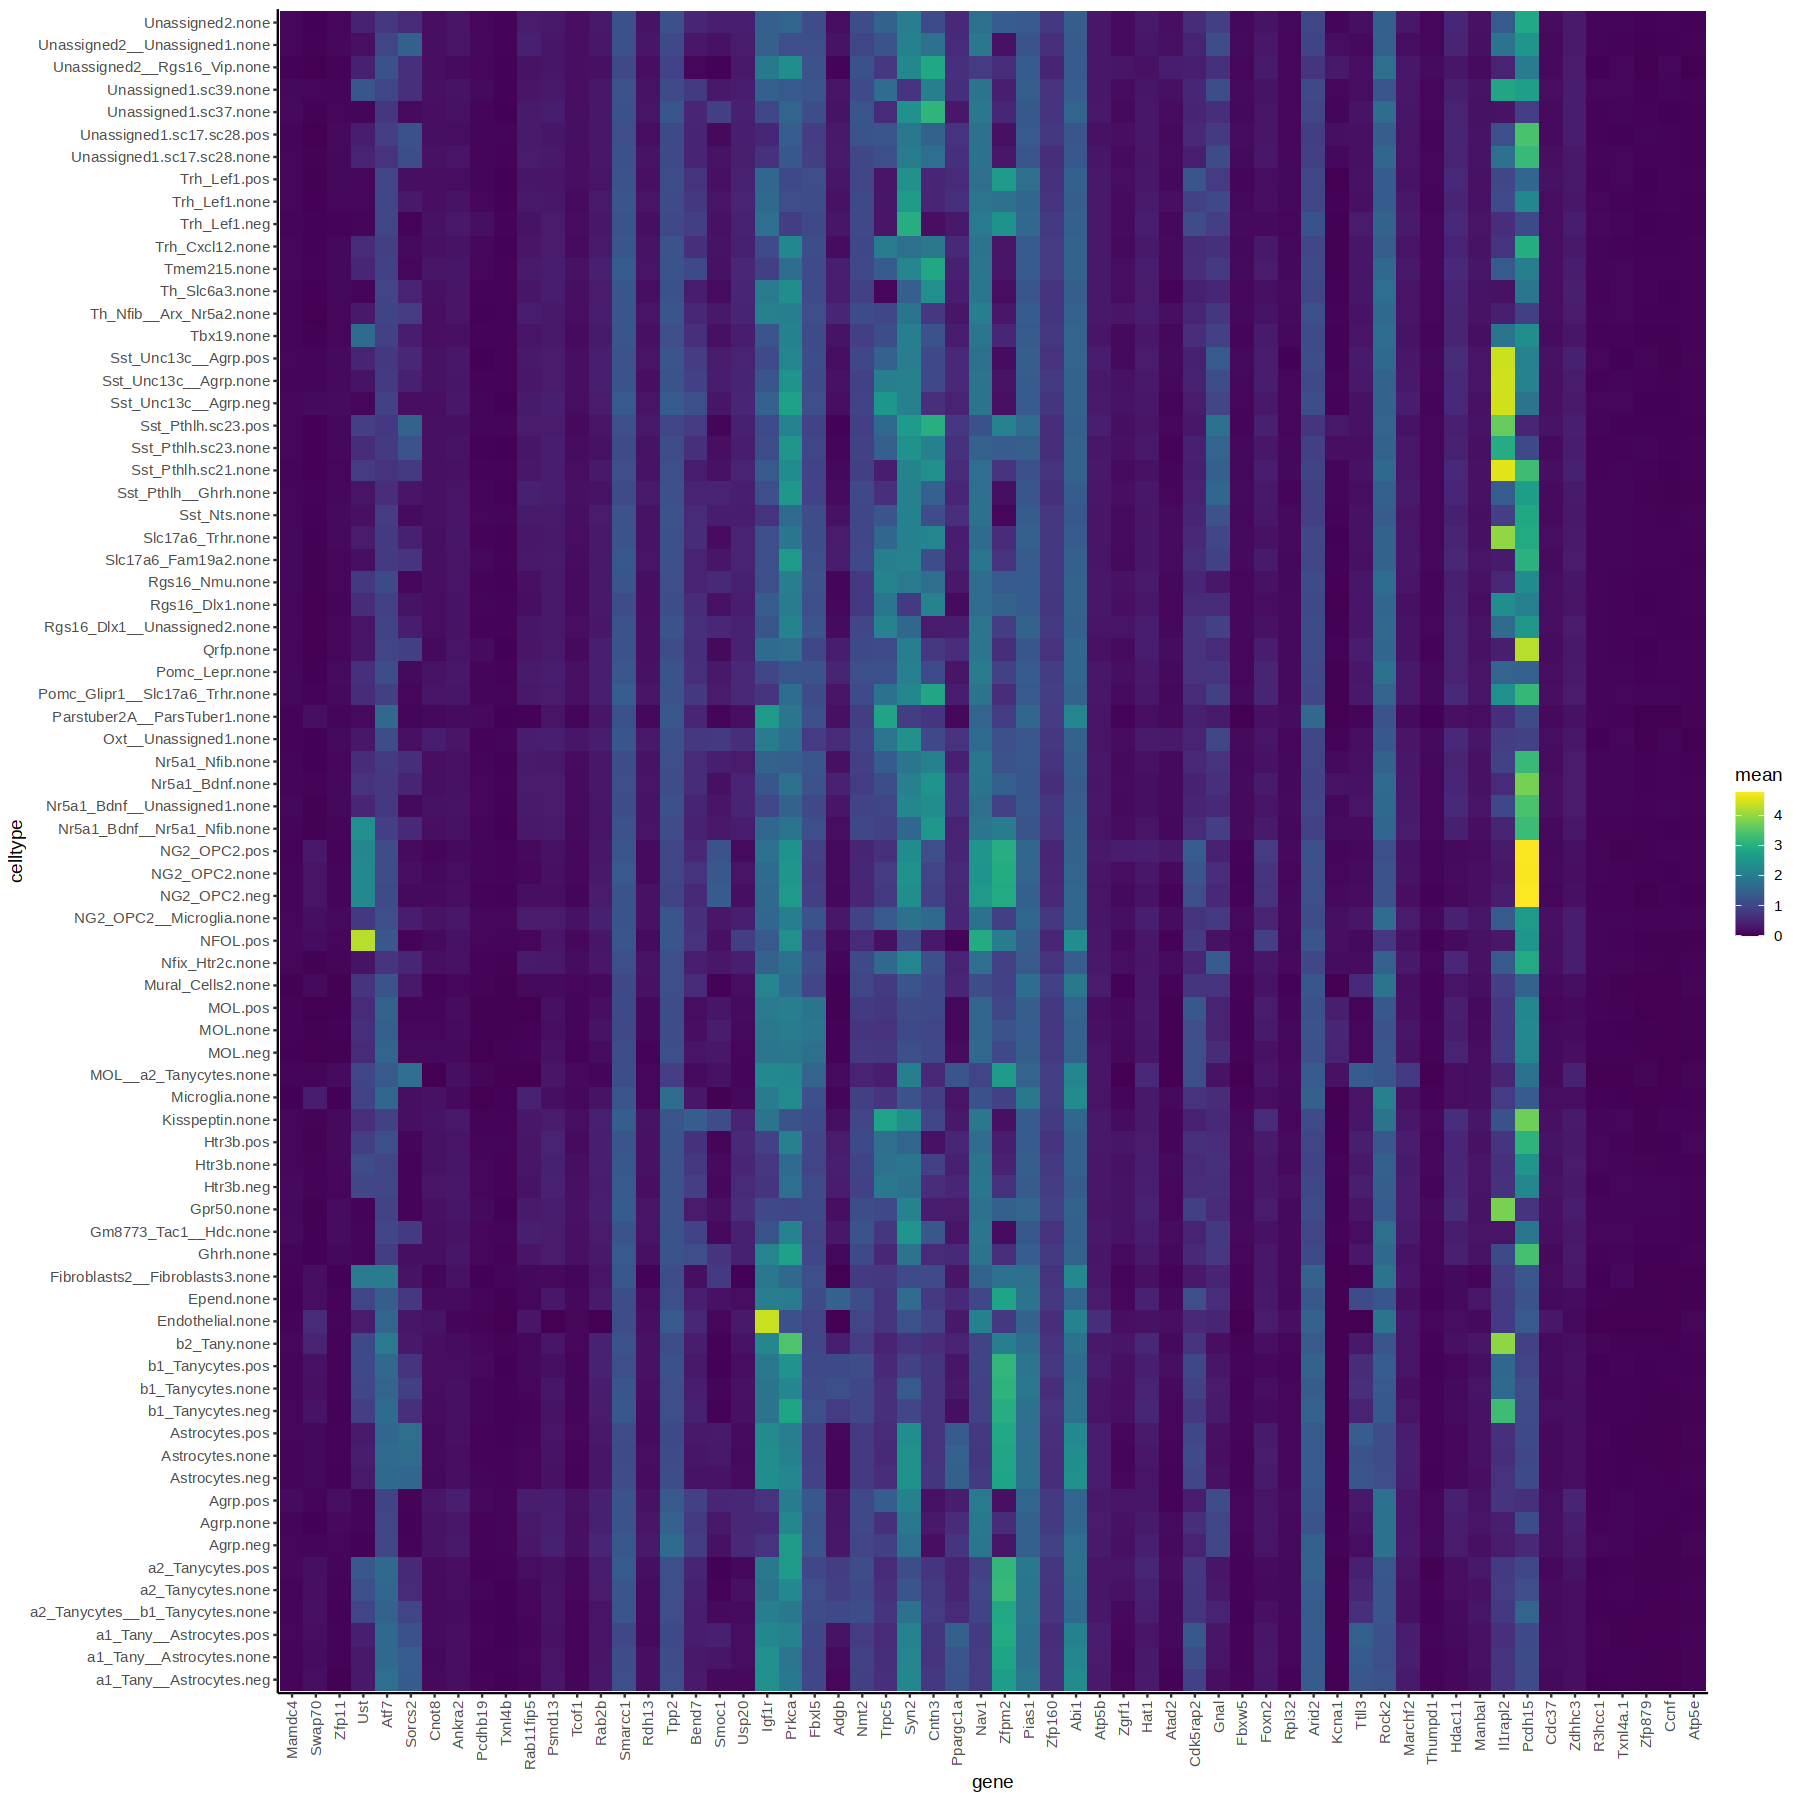

In [74]:
options(repr.plot.width=15, repr.plot.height=15)
exp_mean_p = plot_expression_heatmap(sce, genes = ngo_panel_5ea, value.type = "mean", celltype.id = "polar_label") 
exp_mean_p

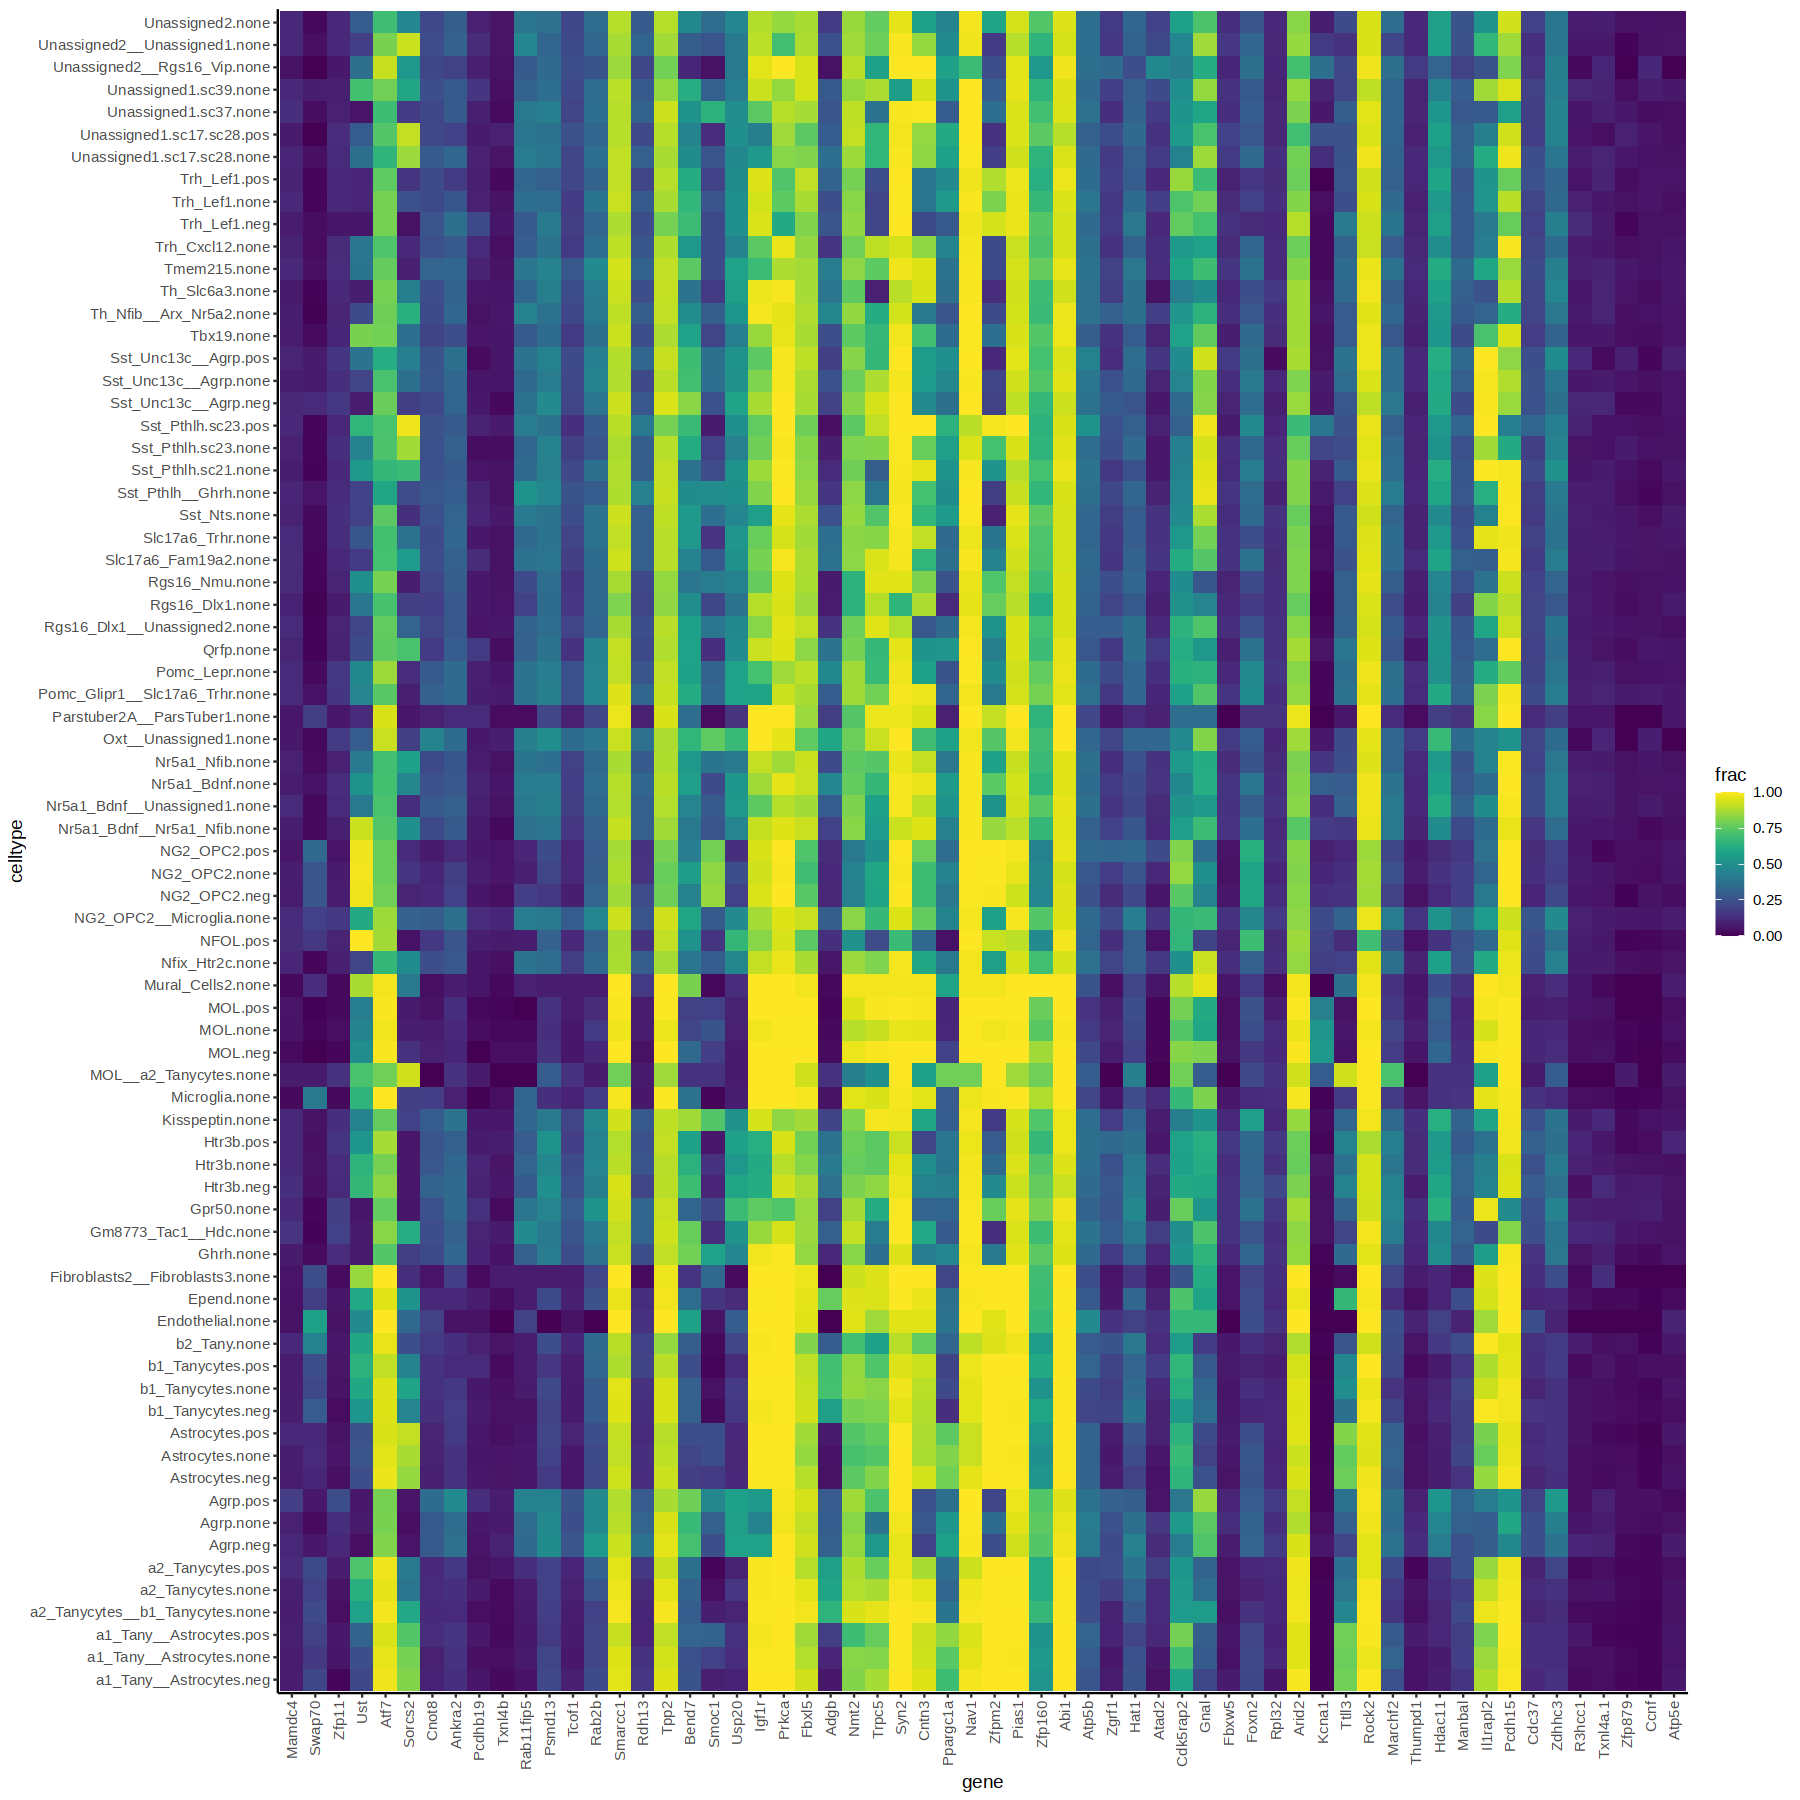

In [73]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_expression_heatmap(sce, genes = ngo_panel_5ea, value.type = "frac", celltype.id = "polar_label") 
p 

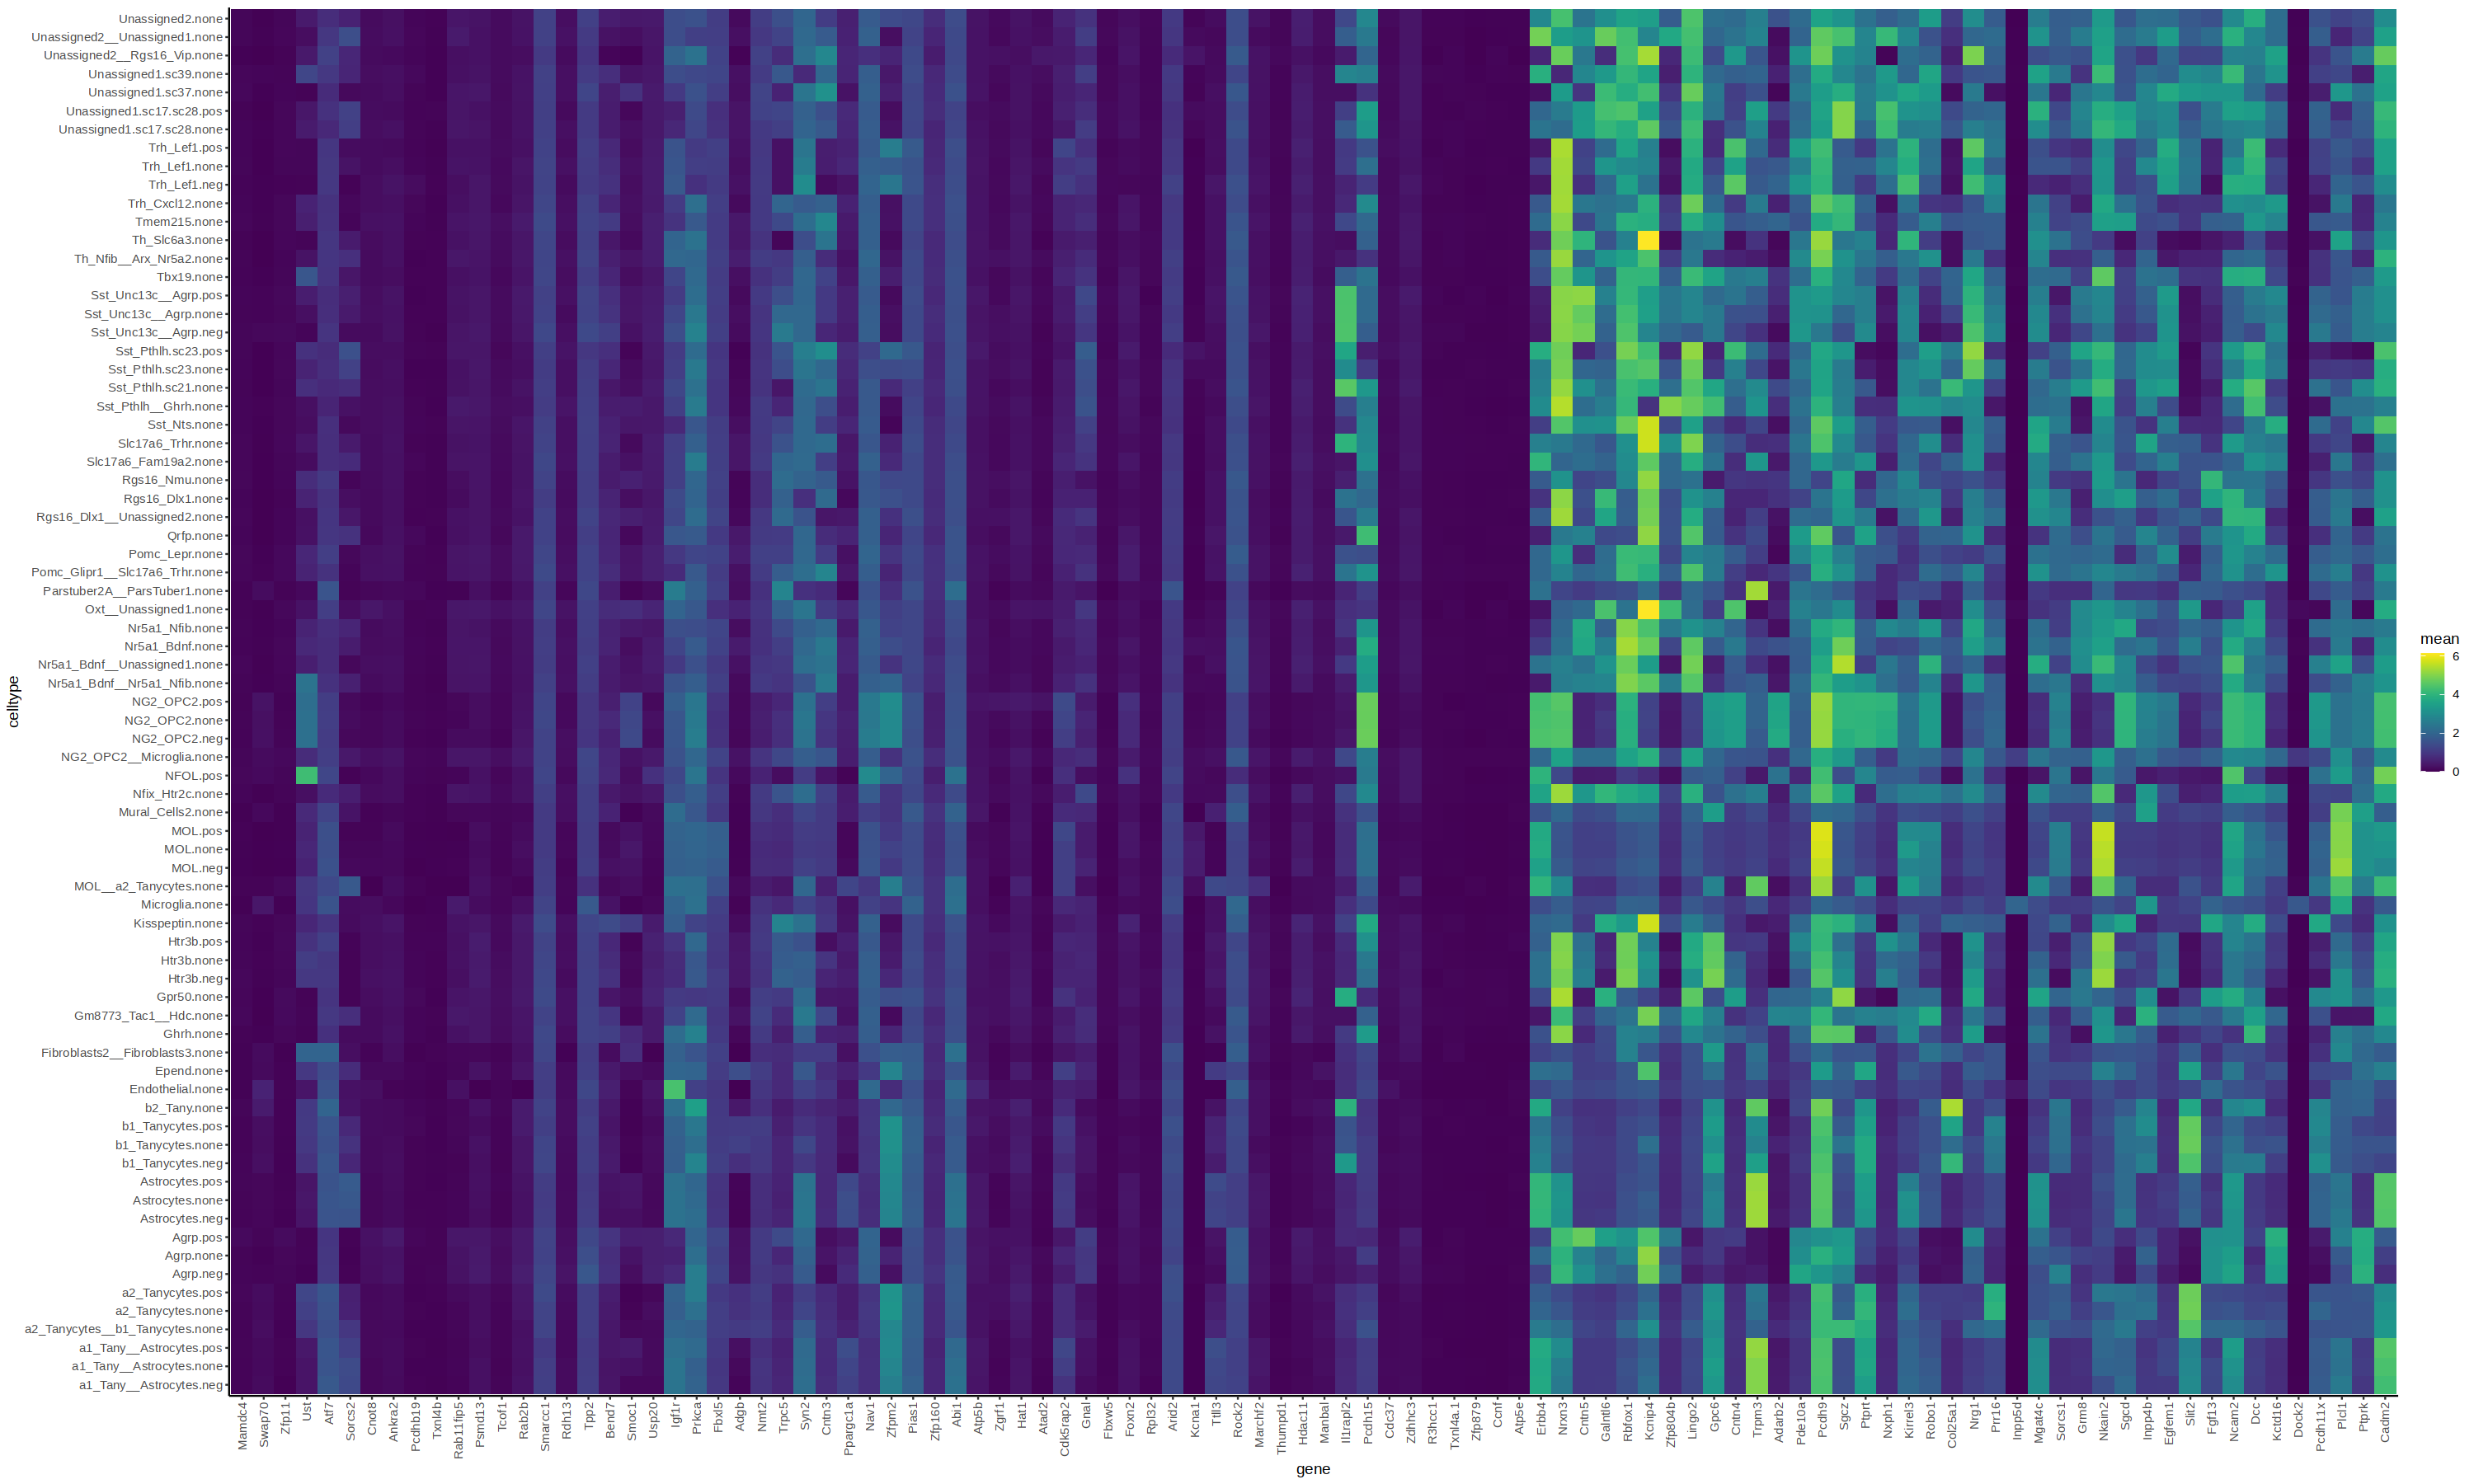

In [79]:
options(repr.plot.width=25, repr.plot.height=15)
exp_mean_p = plot_expression_heatmap(sce, genes = genes_100_all_40k_pre5ea, value.type = "mean", celltype.id = "polar_label") 
exp_mean_p

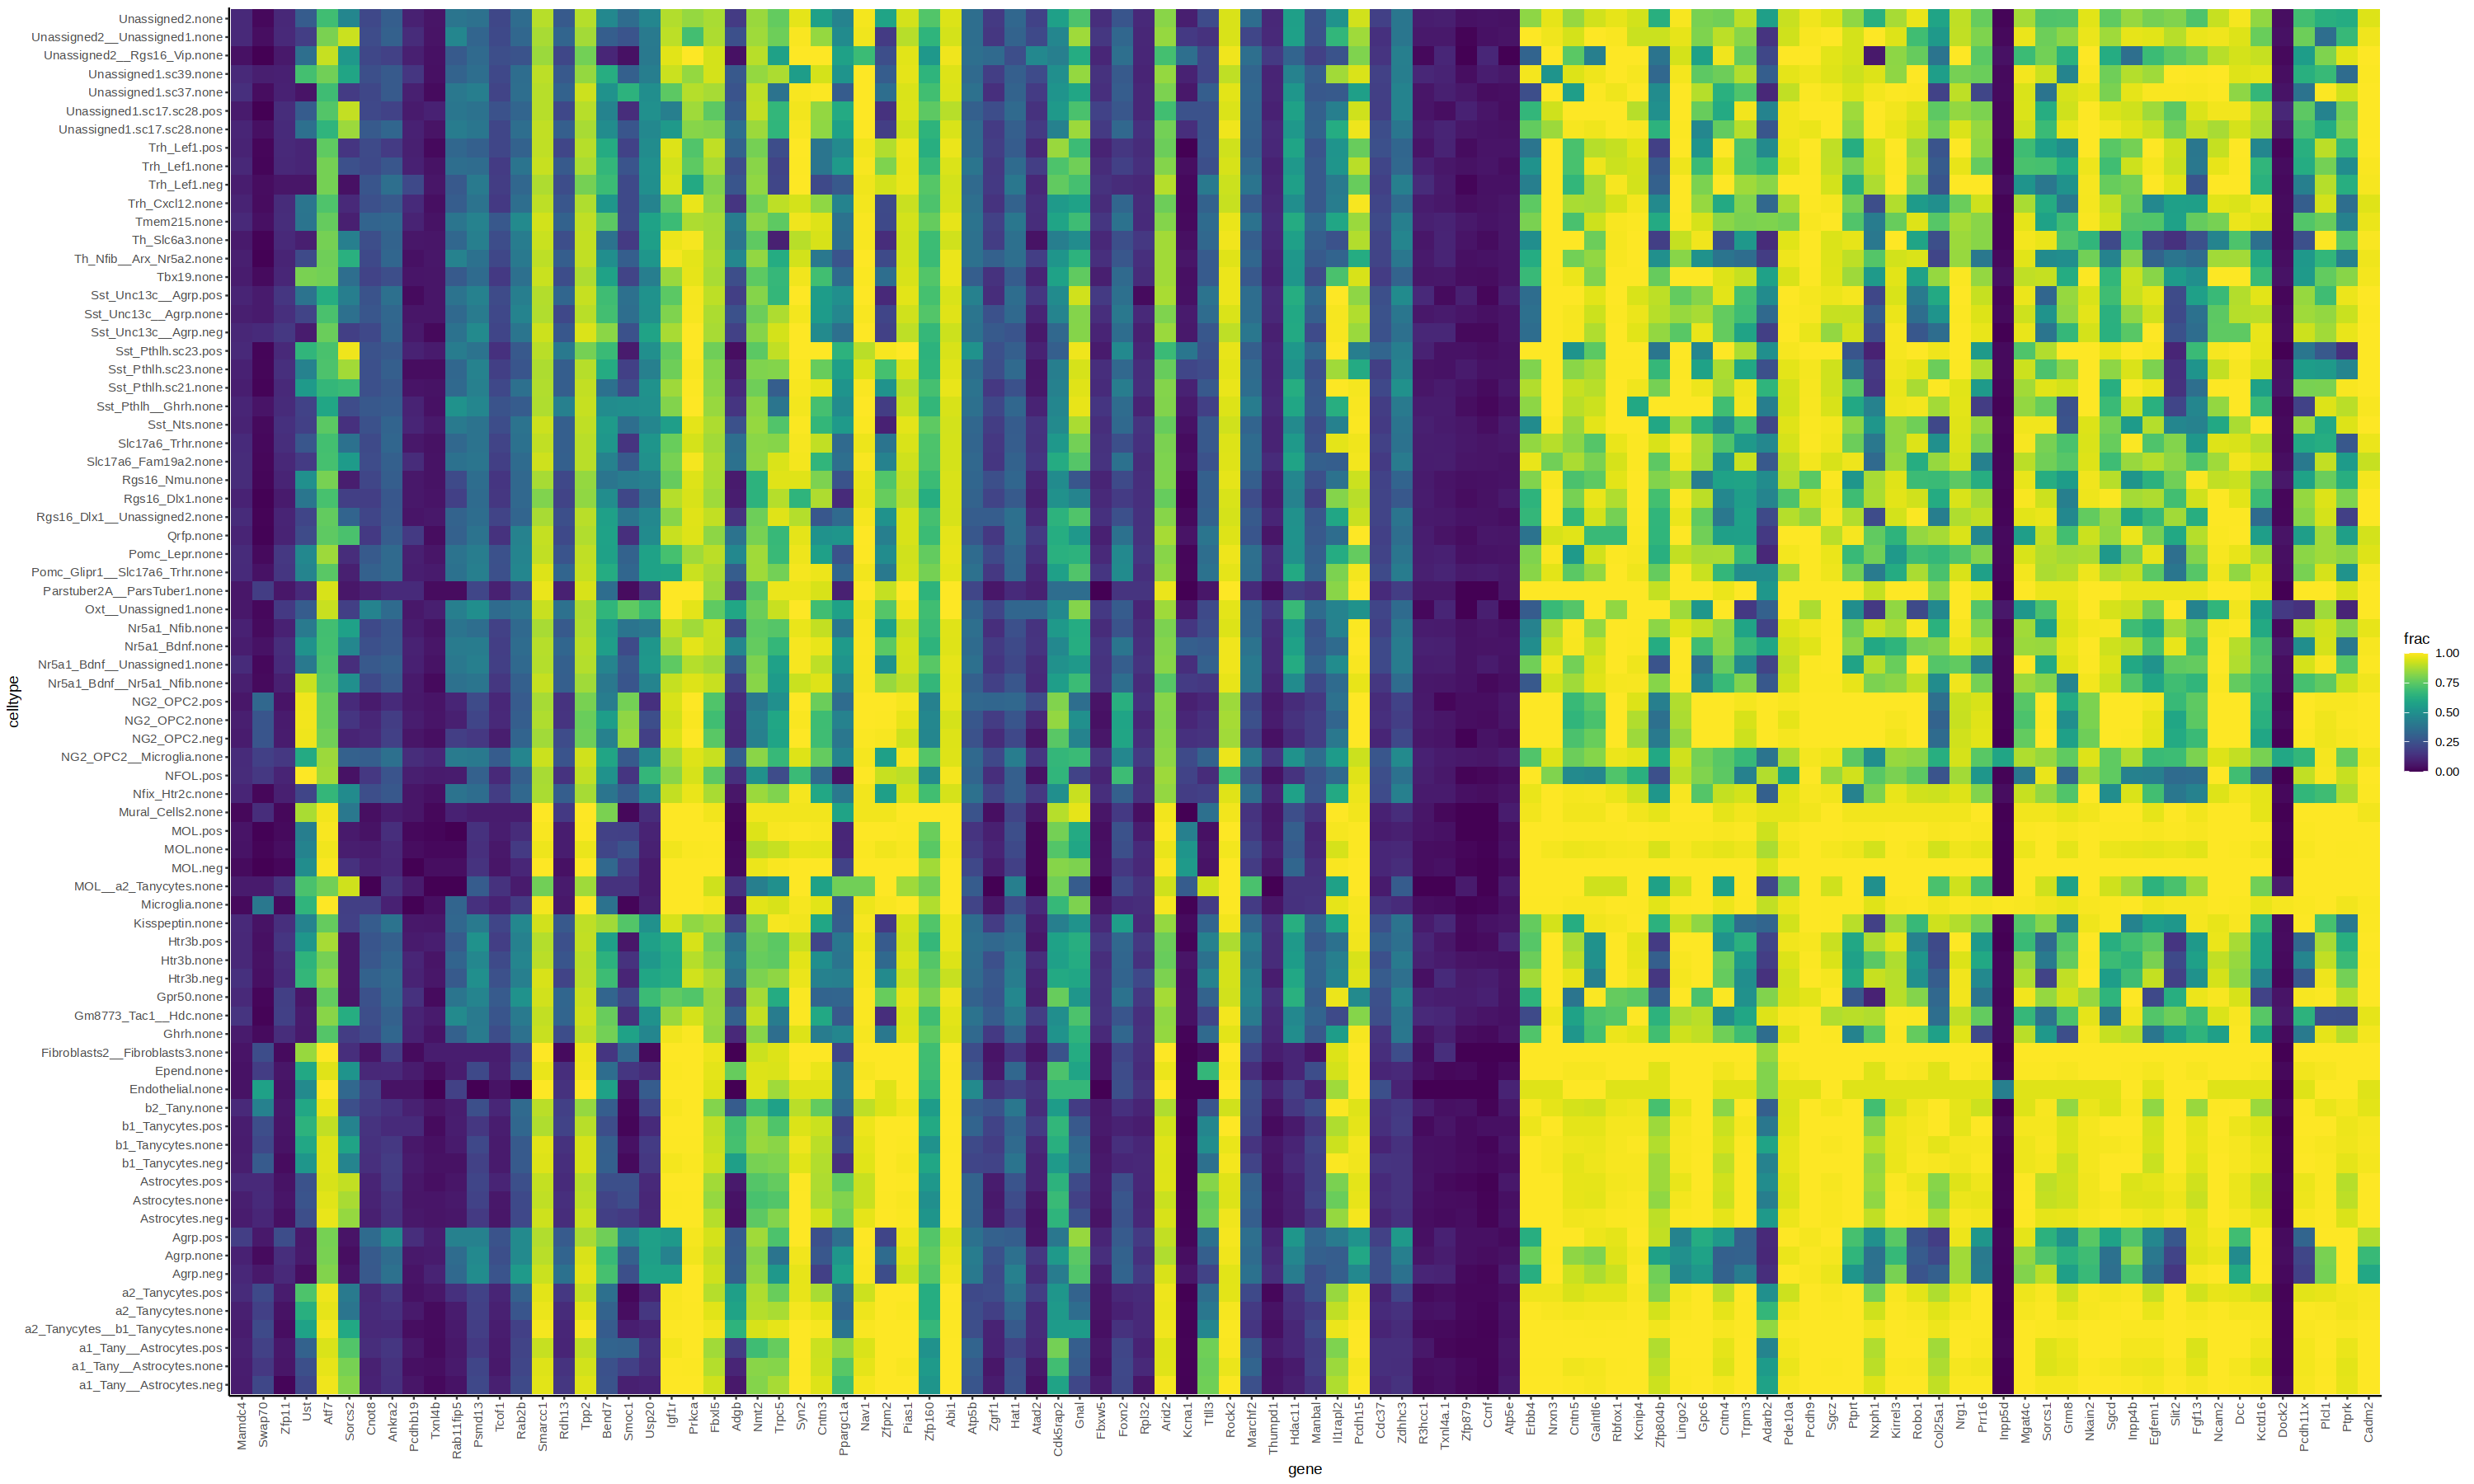

In [80]:
options(repr.plot.width=25, repr.plot.height=15)
p = plot_expression_heatmap(sce, genes = genes_100_all_40k_pre5ea, value.type = "frac", celltype.id = "polar_label") 
p 

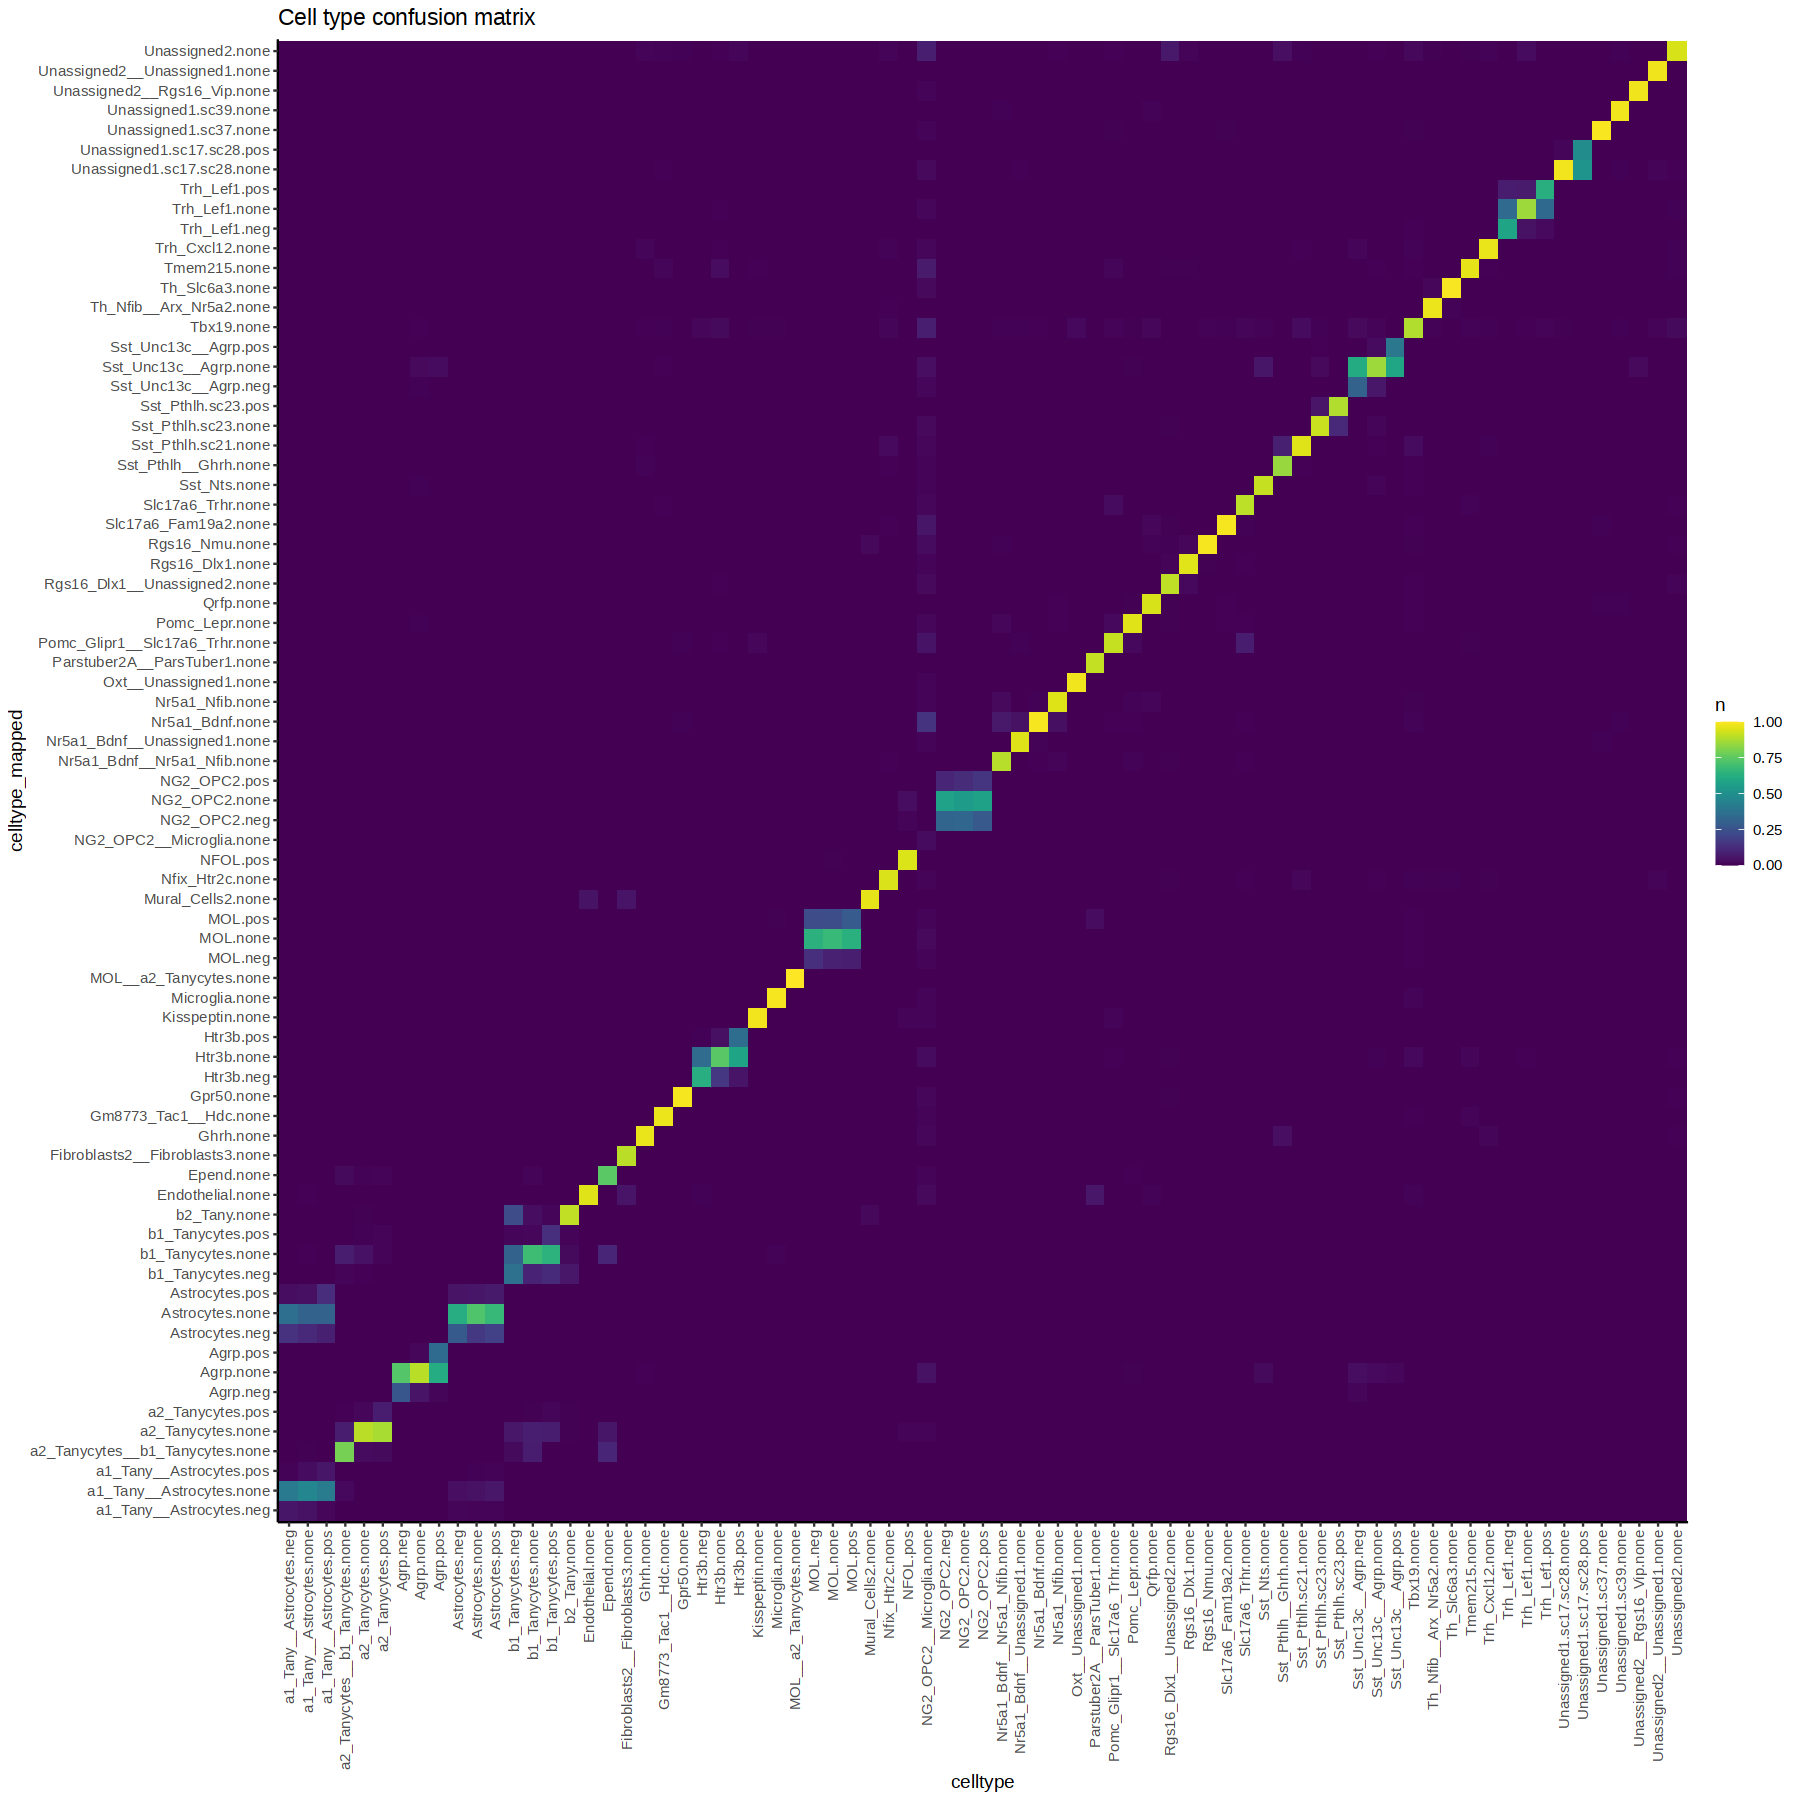

In [82]:
ctm = qs::qread('_targets/objects/ctm_00_100_all_40k')
options(repr.plot.width=15, repr.plot.height=15)
options(repr.plot.width=15, repr.plot.height=15)
mapping = ctm$mapping %>%
mutate(celltype = factor(celltype, levels=sort(unique(celltype)))) %>%
arrange(celltype)
p = plot_mapping_heatmap(mapping, title = "Cell type confusion matrix")
p

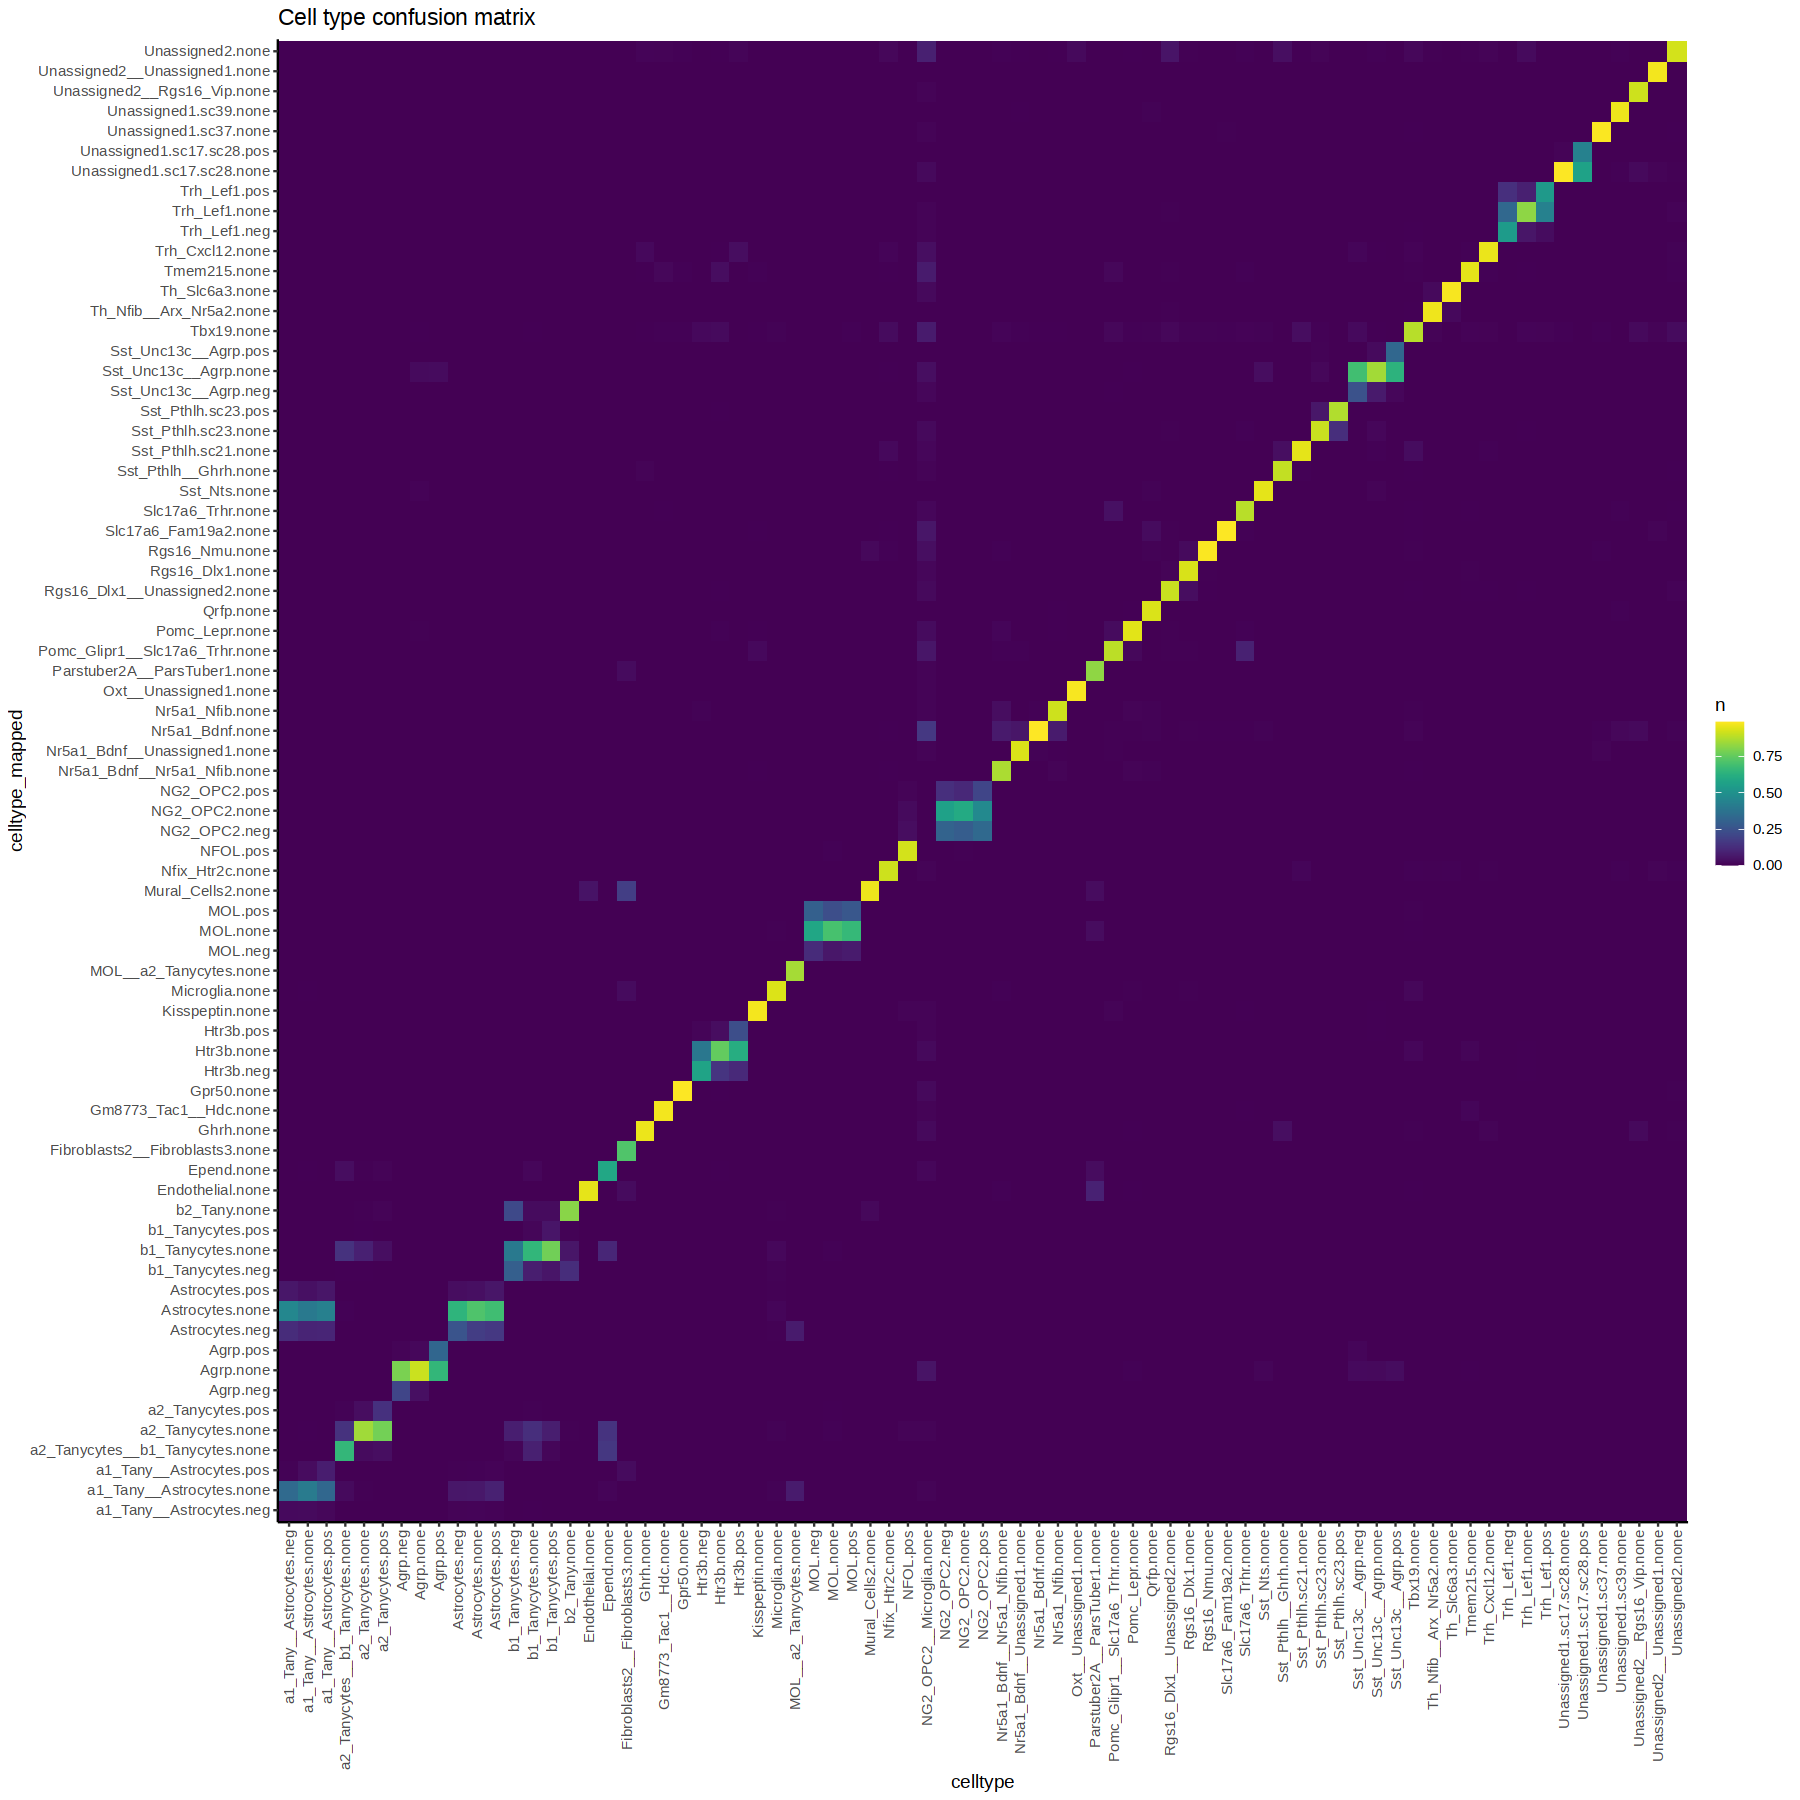

In [81]:
ctm = qs::qread('_targets/objects/ctm_00_100_all_40k_pre5ea')
options(repr.plot.width=15, repr.plot.height=15)
mapping = ctm$mapping %>%
mutate(celltype = factor(celltype, levels=sort(unique(celltype)))) %>%
arrange(celltype)
p = plot_mapping_heatmap(mapping, title = "Cell type confusion matrix")
p

In [83]:
genes_100_all_40k = qs::qread('_targets/objects/genes_100_all_40k')
genes_100_all_40k_pre5ea = qs::qread('_targets/objects/genes_100_all_40k_pre5ea')

In [84]:
intersect(genes_100_all_40k, genes_100_all_40k_pre5ea)

[1] "Kcnip4"   "Lingo2"   "Nrxn3"    "Erbb4"    "Il1rapl2" "Cntn5"   
 [7] "Trpm3"    "Galntl6"  "Gpc6"     "Nxph1"    "Rbfox1"   "Zfp804b" 
[13] "Cntn4"    "Pcdh9"    "Ptprt"    "Pde10a"   "Adarb2"   "Nrg1"    
[19] "Col25a1"  "Robo1"    "Kirrel3"  "Sgcz"     "Mgat4c"   "Nkain2"  
[25] "Inpp5d"   "Egfem1"   "Prr16"    "Dcc"      "Sgcd"     "Slit2"   
[31] "Grm8"     "Sorcs1"   "Ncam2"    "Fgf13"    "Kctd16"   "Inpp4b"  
[37] "Pcdh11x"  "Plcl1"    "Dock2"    "Ptprk"    "Cadm2"    "Pcdh15"

In [85]:
intersect(genes_100_all_40k, genes_100_all_40k_pre5ea) %>% length

[1] 42

In [87]:
genes_100_all_40k_pre5ea[61:100]

[1] "Erbb4"   "Nrxn3"   "Cntn5"   "Galntl6" "Rbfox1"  "Kcnip4"  "Zfp804b"
 [8] "Lingo2"  "Gpc6"    "Cntn4"   "Trpm3"   "Adarb2"  "Pde10a"  "Pcdh9"  
[15] "Sgcz"    "Ptprt"   "Nxph1"   "Kirrel3" "Robo1"   "Col25a1" "Nrg1"   
[22] "Prr16"   "Inpp5d"  "Mgat4c"  "Sorcs1"  "Grm8"    "Nkain2"  "Sgcd"   
[29] "Inpp4b"  "Egfem1"  "Slit2"   "Fgf13"   "Ncam2"   "Dcc"     "Kctd16" 
[36] "Dock2"   "Pcdh11x" "Plcl1"   "Ptprk"   "Cadm2"

In [88]:
genes_100_all_40k

[1] "Kcnip4"   "Lingo2"   "Nrxn3"    "Erbb4"    "Il1rapl2" "Cntn5"   
  [7] "Trpm3"    "Galntl6"  "Gpc6"     "Nxph1"    "Rbfox1"   "Zfp804b" 
 [13] "Cntn4"    "Pcdh9"    "Ptprt"    "Pde10a"   "Adarb2"   "Nrg1"    
 [19] "Col25a1"  "Robo1"    "Kirrel3"  "Sgcz"     "Mgat4c"   "Prkg1"   
 [25] "Nkain2"   "Inpp5d"   "Egfem1"   "Prr16"    "Dcc"      "Sgcd"    
 [31] "Slit2"    "Grm8"     "Sorcs1"   "Ncam2"    "Fgf13"    "Kctd16"  
 [37] "Inpp4b"   "Pcdh11x"  "Plcl1"    "Dock2"    "Ptprk"    "Hs3st4"  
 [43] "Kcnq5"    "Rtl4"     "Pcdh7"    "Slc7a11"  "Dock8"    "Plxdc2"  
 [49] "Lrrtm4"   "Epha6"    "Cpne4"    "Luzp2"    "Cadm2"    "St18"    
 [55] "Runx1"    "Rgs6"     "Sdk1"     "Ly86"     "Ikzf1"    "Ntng1"   
 [61] "Eda"      "Slc1a2"   "Pcdh15"   "Rmst"     "Shc3"     "Alcam"   
 [67] "Mobp"     "Zfp804a"  "P3h2"     "Nfia"     "Sv2c"     "Zeb2"    
 [73] "Brinp3"   "Zfhx3"    "Nkain3"   "Hs6st3"   "Gpc5"     "Auts2"   
 [79] "Mertk"    "Cfap43"   "Pdzrn3"   "Tox"      "Hcn1"     "Hs6st2"  
 [85] "Frmpd4"   "Spred2"   "Edil3"    "Epb41l2"  "Slc2a13"  "Fstl5"   
 [91] "Tafa4"    "Pde4b"    "Hs3st5"   "Spag16"   "Pdzrn4"   "Tgfbr1"  
 [97] "Arhgap6"  "Dnah6"    "Grm7"     "Prr5l"

In [43]:
mapping

cell,celltype,mapped_celltype
<chr>,<fct>,<chr>
GTGAGCCAGGTGCCTC_1_2_1,Nr5a1_Bdnf.none,Nr5a1_Bdnf.none
CTGTCGTTCACTAGCA_3_1_2,NG2_OPC2.pos,NG2_OPC2.neg
GTGACGCCAGAGGGTT_3_3_1,Rgs16_Dlx1__Unassigned2.none,Rgs16_Dlx1__Unassigned2.none
GTAGCTAGTTTGGAGG_4_1_1,Slc17a6_Fam19a2.none,Slc17a6_Fam19a2.none
ATGCCTCTCCTGATAG_1_2_2,Astrocytes.none,Astrocytes.none
CCAATTTAGGGAGGAC_5_1_2,Astrocytes.none,Astrocytes.none
GACCCAGAGTCGGGAT_3_1_1,Nr5a1_Bdnf.none,Nr5a1_Bdnf.none
GGCAGTCTCACACCGG_3_2_2,b1_Tanycytes.none,a2_Tanycytes__b1_Tanycytes.none
AGTCATGAGGGAGGAC_5_1_1,Unassigned1.sc17.sc28.none,Unassigned1.sc17.sc28.none
